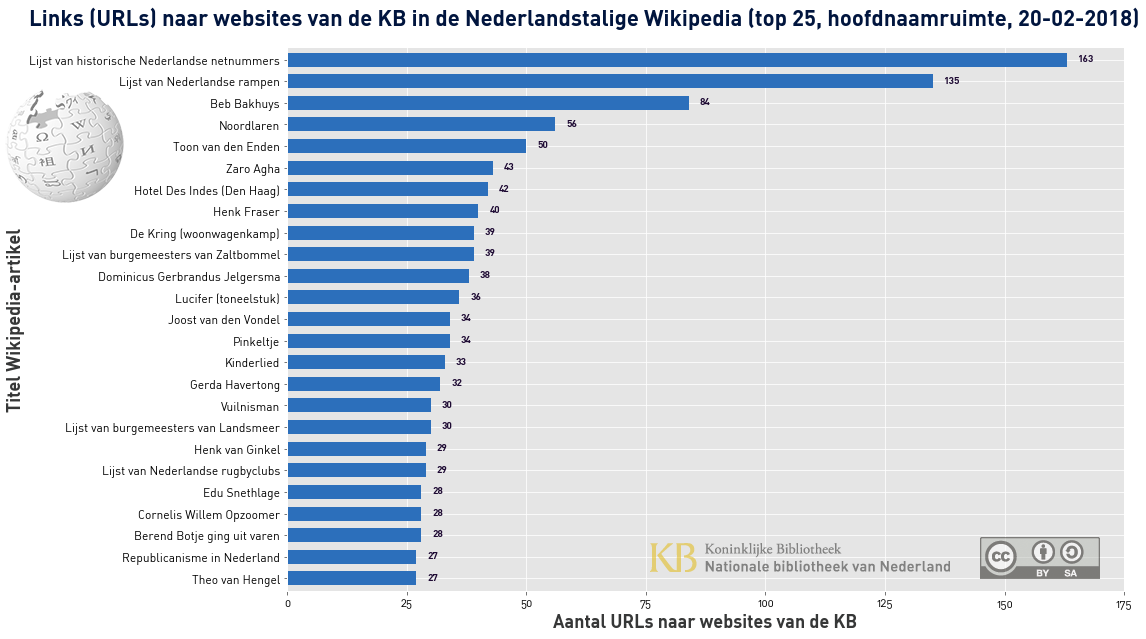

In [2]:
import numpy as np
import pandas as pd
from matplotlib.ticker import ScalarFormatter
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

myboldfont = {'fontname':'DIN-Bold'}
myregularfont = {'family' : 'DIN-RegularAlternate'}
plt.rc('font', **myregularfont)

# set jupyter's max row and columns display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 10)
# set jupyter's max column width to 50
pd.set_option('display.max_colwidth', 50)

#list of colors by name: https://xkcd.com/color/rgb/

file = 'WPNLHoodnaamruimteArtikel-KBdienst-KBurl_definitief_20022018.txt'
#Wikipedia-artikel
#URL_KB

# Load the dataset
data = pd.read_csv(file, sep='ZZZZ', encoding='utf-8', engine='python')

# Make plot
top = 25
bar_width = 0.65
ax = data['WikipediaArtikel'].value_counts().head(top).plot(kind='barh', figsize=(15,10),
                                        color="xkcd:medium blue", fontsize=12, rot=0, width=bar_width)

# Set title and main x,y labels
ax.set_title("Links (URLs) naar websites van de KB in de Nederlandstalige Wikipedia (top "+ str(top) +", hoofdnaamruimte, 20-02-2018)",
             fontsize=22, color="xkcd:navy", fontweight='bold', loc='left', **myboldfont).set_position([-0.308,1.03])
ax.set_xlabel("Aantal URLs naar websites van de KB", fontsize=18, color="xkcd:dark grey", **myboldfont);
ax.set_ylabel("Titel Wikipedia-artikel", fontsize=18, color="xkcd:dark grey", **myboldfont);

# invert for largest on top 
ax.invert_yaxis()

#set x ticks
xticklist=[0, 25, 50, 75, 100, 125, 150, 175]
ax.set_xticks(xticklist)

#Make x and y tick labels black
for i in list(range(0, len(xticklist))): 
    ax.get_xticklabels()[i].set_color('xkcd:black') 
for j in list(range(0,top)):    
    ax.get_yticklabels()[j].set_color('xkcd:black')

#Add numbers at ends of bars
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+2.3, i.get_y()+.40, i.get_width(), fontsize=10, color='#1e0a33', **myboldfont)

#Add logos
logo_kb = plt.imread('KBlogoNL_300px.png')
logo_wp= plt.imread('logo_wp_120px.png')
logo_bysa=plt.imread('by-sa_120px.png')
ax.figure.figimage(logo_kb, 650, 67, alpha=.5, zorder=1,resize=False)
ax.figure.figimage(logo_wp, 5, 430, alpha=.5, zorder=1,resize=False)
ax.figure.figimage(logo_bysa, 980, 60, alpha=.5, zorder=1,resize=False)